In [1]:
#import a bunch of things

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [27]:
from pathlib import Path
text = Path("Datasets/wikitext.txt").read_text(encoding="utf-8")
print(f"Total characters in wikitext.txt: {len(text):,}")
from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("./gpt2_tokenizer")
tokens = tokenizer(text)["input_ids"]
print(f"Total GPT2 tokens: {len(tokens):,}")

Total characters in wikitext.txt: 10,929,707


Token indices sequence length is longer than the specified maximum sequence length for this model (2403644 > 1024). Running this sequence through the model will result in indexing errors


Total GPT2 tokens: 2,403,644


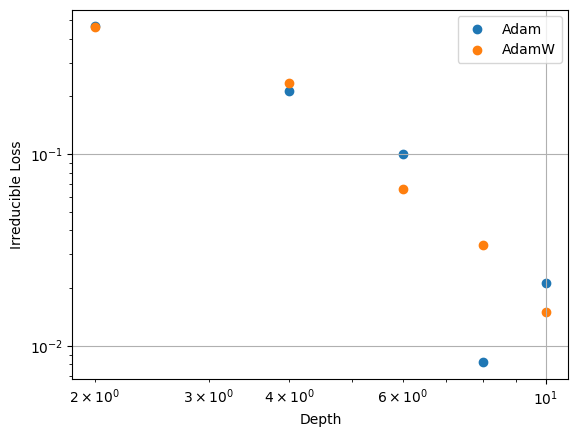

In [20]:
#read in the data
data = pd.read_csv("experiment_results.csv")
irreducible_loss = 1.25
adam_results = data['Final Loss with Adam']
adamw_results = data['Final Loss with AdamW']
depths = data['Depth']
#subtract 1.511 from all the results
adam_results = adam_results-irreducible_loss
adamw_results = adamw_results-irreducible_loss
plt.scatter(depths, adam_results, label='Adam')
plt.scatter(depths, adamw_results, label='AdamW')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Depth')
plt.ylabel('Irreducible Loss')
plt.grid(True)
plt.legend()
plt.show()



#secon plot of loss differences
# loss_differences = adamw_results - adam_results
# plt.scatter(depths, loss_differences)
# plt.xscale('log')
# plt.grid(True)
# plt.show()

#plot the data
# plt.figure(figsize=(10, 6))
# sns.lineplot(x="depth", y="loss", data=data, hue="activation")
# plt.show()


# Figure Out How to Convert to Compute Multiplier

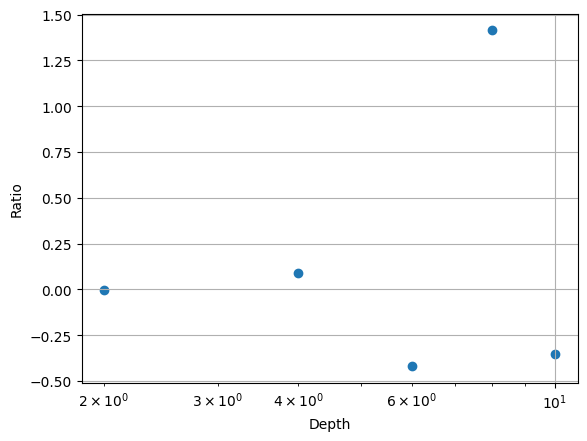

In [24]:
#look at ratio 
ratios =np.log(adamw_results)-np.log(adam_results)
plt.scatter(depths, ratios)
plt.xscale('log')
plt.xlabel('Depth')
plt.ylabel('Ratio')
plt.grid(True)

# Analysis of Algorithmic Comparison Experiment Data

adam/sgd effect -0.32627937194992485 compute effect 8.207334503463057
rotary effect over sinusoidal -0.0976052070301745 compute effect 1.8770680527949888
transformer init vs xavier effect -0.004431573640841346 compute effect 1.0290034377207744
dropout effect/no-dropout effect -0.014684551682921043 compute effect 1.099371929016688


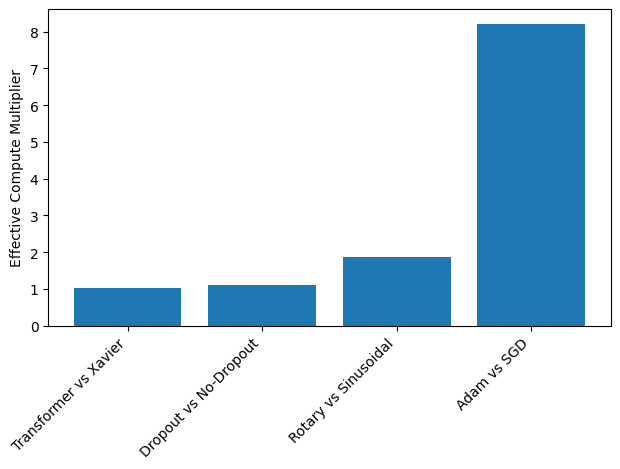

In [16]:
import numpy as np
import matplotlib.pyplot as plt
irreducible = 1.7
effect_adam = np.log(10.68-1.7) - np.log(8.18-1.7)
compute_effect_adam = np.exp(effect_adam/.155)
print("adam/sgd effect", -effect_adam, "compute effect", np.exp(effect_adam/.155))
effect_rotary = np.log(7.5585-1.7) - np.log(7.0137-1.7)
compute_effect_rotary = np.exp(effect_rotary/.155)
print("rotary effect over sinusoidal", -effect_rotary, "compute effect", compute_effect_rotary)
effect_init = np.log(7.58-1.7) - np.log(7.554-1.7)
compute_effect_init = np.exp(effect_init/.155)
print("transformer init vs xavier effect", -effect_init, "compute effect", compute_effect_init)
effect_dropout = np.log(7.5996-1.7) - np.log(7.5136-1.7)
compute_effect_dropout = np.exp(effect_dropout/.155)
print("dropout effect/no-dropout effect", -effect_dropout, "compute effect", compute_effect_dropout)

#sort the compute effects and graph 
labels = ['Adam vs SGD', 'Rotary vs Sinusoidal', 'Transformer vs Xavier', 'Dropout vs No-Dropout']
compute_effects = [compute_effect_adam, compute_effect_rotary, compute_effect_init, compute_effect_dropout]

# Sort effects and corresponding labels
sorted_data = sorted(zip(compute_effects, labels))
sorted_effects, sorted_labels = zip(*sorted_data)

fig, ax = plt.subplots()
bars = ax.bar(range(len(sorted_effects)), sorted_effects)

# Set the x-tick positions and labels
ax.set_xticks(range(len(sorted_effects)))
ax.set_xticklabels(sorted_labels, rotation=45, ha='right')
plt.ylabel('Effective Compute Multiplier')
plt.tight_layout()
plt.show()


In [21]:
diff = np.log(2.65-2.5)-np.log(2.55-2.5)
print("compute effect", np.exp(diff))

compute effect 3.0000000000000084


[2.2345613032350125, 2.429585946615238, 2.554830762867417, 2.702986191755334]
Power law fit: y = 2.0741 * x^0.1093


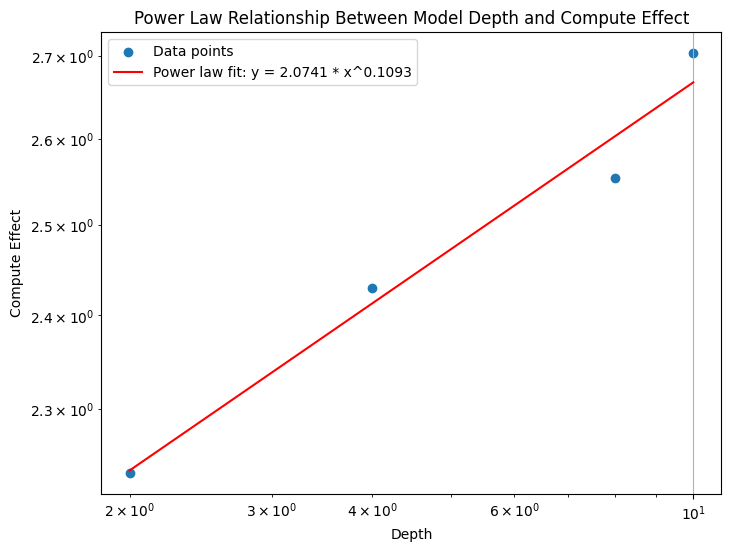

2.7139384876415877


In [48]:
def compute_effect(loss_1, loss_2):
    irreducible = 1.7
    return np.exp(-(np.log(loss_1-irreducible)-np.log(loss_2-irreducible))/.155)
# Calculate compute effects for different model depths
loss_adam = [8.1087, 8.0181, 7.9631, 7.9063]
loss_sgd = [8.9593, 8.9501, 8.9432, 8.9405]
loss_pairs = zip(loss_adam, loss_sgd)
compute_effects = [compute_effect(loss_1, loss_2) for loss_1, loss_2 in loss_pairs]
print(compute_effects)
depths = [2, 4, 8, 10]

# Fit power law (y = ax^b) by converting to log-log space and using linear regression
log_depths = np.log(depths)
log_effects = np.log(compute_effects)
slope, intercept = np.polyfit(log_depths, log_effects, 1)
power_law_exponent = slope
power_law_coefficient = np.exp(intercept)

# Print the power law parameters
print(f"Power law fit: y = {power_law_coefficient:.4f} * x^{power_law_exponent:.4f}")

# Plot the data points and the power law fit
plt.figure(figsize=(8, 6))
plt.scatter(depths, compute_effects, label='Data points')
plt.plot(depths, power_law_coefficient * np.array(depths)**power_law_exponent, 
         'r-', label=f'Power law fit: y = {power_law_coefficient:.4f} * x^{power_law_exponent:.4f}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Depth')
plt.ylabel('Compute Effect')
plt.title('Power Law Relationship Between Model Depth and Compute Effect')
plt.legend()
plt.grid(True)
plt.show()


print((10**4)**0.1084)



In [49]:

# # glu:
# #   Final: 4.3721 ± 0.0027
# #   Best:  4.3721 ± 0.0027
# # gelu:
# #   Final: 4.4421 ± 0.0024
# #   Best:  4.4421 ± 0.0024
# # relu:
# #   Final: 4.3918 ± 0.0006
# #   Best:  4.3918 ± 0.0006
# # swiglu:
# #   Final: 4.3554 ± 0.0011
#   Best:  4.3554 ± 0.0011

print(2.15/2.09)
swiglu_effect = compute_effect(4.3554, 4.44)
print(swiglu_effect/(2.15/2.09))

1.0287081339712918
1.1900980447679061


In [51]:
# sinusoidal:
#   Final: 6.6211 ± 0.0178
#   Best:  6.6211 ± 0.0178
# learned:
#   Final: 5.7047 ± 0.0025
#   Best:  5.7047 ± 0.0025
# rotary:
#   Final: 5.6625 ± 0.0040
#   Best:  5.6625 ± 0.0040
#with half the data 

# sinusoidal:
#   Final: 4.6752 ± 0.0227
#   Best:  4.6752 ± 0.0227
# learned:
#   Final: 4.4719 ± 0.0006
#   Best:  4.4719 ± 0.0006
# rotary:
#   Final: 4.4454 ± 0.0045
#   Best:  4.4454 ± 0.0045
#full 10 epoch



rotary_effect = compute_effect(4.4454, 4.4719)
print(rotary_effect)





1.06393641048448
